# Data wrangling - JSON project
****

+ Find the 10 countries with the most projects.
+ Find the top 10 major project themes (using column 'mjtheme_namecode').
+ For some entries in the exercise above, the name is missing. Create a dataframe filling in the missing names.

****


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import json
from pandas.io.json import json_normalize
import numpy as np

In [2]:
# load as pandas dataframe
json_df = pd.read_json('data/world_bank_projects.json')

# info
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 50 columns):
_id                         500 non-null object
approvalfy                  500 non-null int64
board_approval_month        500 non-null object
boardapprovaldate           500 non-null object
borrower                    485 non-null object
closingdate                 370 non-null object
country_namecode            500 non-null object
countrycode                 500 non-null object
countryname                 500 non-null object
countryshortname            500 non-null object
docty                       446 non-null object
envassesmentcategorycode    430 non-null object
grantamt                    500 non-null int64
ibrdcommamt                 500 non-null int64
id                          500 non-null object
idacommamt                  500 non-null int64
impagency                   472 non-null object
lendinginstr                495 non-null object
lendinginstrtype            495 non

In [3]:
# head of the dataframe
json_df.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


### 1) Find the 10 countries with most projects

In [4]:
most_proj = json_df['countryshortname'].value_counts()
print(most_proj)
print(most_proj.shape)

China                               19
Indonesia                           19
Vietnam                             17
India                               16
Yemen, Republic of                  13
Nepal                               12
Bangladesh                          12
Morocco                             12
Mozambique                          11
Africa                              11
Brazil                               9
Burkina Faso                         9
Pakistan                             9
Armenia                              8
Tanzania                             8
Tajikistan                           8
Jordan                               7
Kyrgyz Republic                      7
Lao People's Democratic Republic     7
Nigeria                              7
Peru                                 6
Nicaragua                            6
Kenya                                6
West Bank and Gaza                   6
Afghanistan                          6
Congo, Democratic Republi

In [5]:
# the 10 'countries' at the top are
print(most_proj.head(10))

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Name: countryshortname, dtype: int64


However, Africa is not a country and as shown above, we can also notice that neither 'Europe and Central Asia' is, for example. It is, in fact, better to confirm that from the beginning, since other countries could be embedded in a general region. Looking at the list of labeled countries in its entirety:

In [6]:
print(most_proj.to_string())

China                                     19
Indonesia                                 19
Vietnam                                   17
India                                     16
Yemen, Republic of                        13
Nepal                                     12
Bangladesh                                12
Morocco                                   12
Mozambique                                11
Africa                                    11
Brazil                                     9
Burkina Faso                               9
Pakistan                                   9
Armenia                                    8
Tanzania                                   8
Tajikistan                                 8
Jordan                                     7
Kyrgyz Republic                            7
Lao People's Democratic Republic           7
Nigeria                                    7
Peru                                       6
Nicaragua                                  6
Kenya     

Of the 118 rows, the following ones do not represent countries:

1) Africa; 2) Middle East and North Africa;  3) Pacific Islands;  4) East Asia and Pacific;  5) Europe and Central Asia; 6) South Asia

Another way of showing the potential regions included in the Series 'countryshortname' is by searching them.
Based on the list of regions and subregions of the United Nations geoscheme (https://en.wikipedia.org/wiki/United_Nations_geoscheme) and the United Nations Country group (https://www.internetworldstats.com/list1.htm), and still adding anything which would contain the word 'Pacific':

In [7]:
list_countries = json_df['countryshortname']
regions = ['Africa', 'America', 'Asia', 'Europe', 'Middle East', 'Oceania', 'Pacific']

for x in regions:
    print(set(json_df[json_df['countryshortname'].str.contains(x)]['countryshortname']))


{'Central African Republic', 'Africa', 'Middle East and North Africa'}
set()
{'South Asia', 'East Asia and Pacific', 'Europe and Central Asia'}
{'Europe and Central Asia'}
{'Middle East and North Africa'}
set()
{'Pacific Islands', 'East Asia and Pacific'}


In [8]:
# data columns
json_df.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

Since the columnn 'countrycode' does not tell the corresponding country, one way to see this is to look at the 'borrower' column, where, although it does not always clarify the country (for example, one instance says 'MINISTRY OF FINANCE AND ECONOMIC DEVEL', as seen above), on some other instances it does, so I will use that.

In [9]:
# looking at Africa
africa_df = json_df[json_df['countryshortname'] == 'Africa']
africa_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
45,{'$oid': '52b213b38594d8a2be17c7ad'},2014,September,2013-09-12T00:00:00Z,ECOWAS,NaN,Africa!$!3A,3A,Africa,Africa,...,JA,IBRD,Active,N,"{'Percent': 100, 'Name': 'Health system perfor...","[{'code': '67', 'name': 'Health system perform...",67,0,10000000,http://www.worldbank.org/projects/P125018/west...
46,{'$oid': '52b213b38594d8a2be17c7ae'},2014,September,2013-09-10T00:00:00Z,UGANDA-COMOROS,2018-06-30T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,"BM,CA,CT",IBRD,Active,N,"{'Percent': 20, 'Name': 'Administrative and ci...","[{'code': '25', 'name': 'Administrative and ci...","39,40,78,25",22000000,22000000,http://www.worldbank.org/projects/P118213/rcip...
51,{'$oid': '52b213b38594d8a2be17c7b3'},2014,September,2013-09-04T00:00:00Z,"OSS, IUCN, CILSS",NaN,Africa!$!3A,3A,Africa,Africa,...,"AI,AB,AZ,WZ",IBRD,Active,N,"{'Percent': 20, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","85,82,81,83,80",0,4630000,http://www.worldbank.org/projects/P130888/buil...
58,{'$oid': '52b213b38594d8a2be17c7ba'},2014,August,2013-08-28T00:00:00Z,BANK EXECUTED,NaN,Africa!$!3A,3A,Africa,Africa,...,"AT,AZ",IBRD,Active,N,"{'Percent': 50, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","82,80",0,2000000,http://www.worldbank.org/projects/P144902?lang=en
65,{'$oid': '52b213b38594d8a2be17c7c1'},2014,August,2013-08-06T00:00:00Z,"BURUNDI,RWANDA,TANZANIA",2020-12-31T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,LH,IBRD,Active,N,"{'Percent': 15, 'Name': 'Infrastructure servic...","[{'code': '39', 'name': 'Infrastructure servic...","47,79,62,39",339900000,339900000,http://www.worldbank.org/projects/P075941/nels...
99,{'$oid': '52b213b38594d8a2be17c7e3'},2013,June,2013-06-28T00:00:00Z,GOVERNMENT OF MALI,NaN,Africa!$!3A,3A,Africa,Africa,...,"YA,BL,AB",IBRD,Active,Y,"{'Percent': 25, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","78,27,48,47",60000000,60000000,http://www.worldbank.org/projects/P145160/addi...
167,{'$oid': '52b213b38594d8a2be17c827'},2013,May,2013-05-30T00:00:00Z,MINISTRIES OF TELECOM AND ICT,2018-11-30T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,"BZ,BM,CZ,CT",IBRD,Active,N,"{'Percent': 25, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","48,40,39,47",60000000,60000000,http://www.worldbank.org/projects/P123093/west...
184,{'$oid': '52b213b38594d8a2be17c838'},2013,May,2013-05-21T00:00:00Z,TANZANIA,2018-12-31T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,"BQ,BV,TI",IBRD,Active,N,"{'Percent': 23, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","88,74,49,47",213000000,213000000,http://www.worldbank.org/projects/P120370/sout...
287,{'$oid': '52b213b38594d8a2be17c89f'},2013,March,2013-03-14T00:00:00Z,"MALAWI, MOZAMBIQUE, ZAMBIA",2020-01-31T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,"AZ,AI,AH,BL,AB",IBRD,Active,N,"{'Percent': 80, 'Name': 'Rural services and in...","[{'code': '78', 'name': 'Rural services and in...","47,48,78",90000000,90000000,http://www.worldbank.org/projects/P094183/agri...
353,{'$oid': '52b213b38594d8a2be17c8e1'},2013,January,2013-01-01T00:00:00Z,NILE BASIN INITIATIVE,2015-12-31T00:00:00Z,Africa!$!3A,3A,Africa,Africa,...,"BW,WZ",IBRD,Active,N,"{'Percent': 74, 'Name': 'Water resource manage...","[{'code': '85', 'name': 'Water resource manage...","82,57,85",0,15300000,http://www.worldbank.org/projects/P130694/nile...


The only ones who have an impact on the answer are:

 1) Tanzania, with 2 entries. Adding up, it now has 10 projects;  
 2) Mozambique, with 1 entry. Although it does not change the list with only the names of the 10 top countries, I'll add up to order the list regarding the number of projects. It has now 12 projects.
 
 Following the links at the column 'url' where the borrower did not have the country name explicit, they either returned 'Page Not Found Error 404' or the information was not available.

In [10]:
# looking at Middle East and North Africa, it does not have an impact on the answer
mena_df = json_df[json_df['countryshortname'] == 'Middle East and North Africa']
mena_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
131,{'$oid': '52b213b38594d8a2be17c803'},2013,June,2013-06-18T00:00:00Z,CAWTAR,2014-12-31T00:00:00Z,Middle East and North Africa!$!5M,5M,Middle East and North Africa,Middle East and North Africa,...,FI,IBRD,Active,N,"{'Percent': 40, 'Name': 'Micro, Small and Medi...","[{'code': '41', 'name': 'Micro, Small and Medi...",41,0,600000,http://www.worldbank.org/projects/P144655/mnxt...
179,{'$oid': '52b213b38594d8a2be17c833'},2013,May,2013-05-23T00:00:00Z,NaN,2017-12-31T00:00:00Z,Middle East and North Africa!$!5M,5M,Middle East and North Africa,Middle East and North Africa,...,"LR,YW,WZ,AZ",IBRD,Active,N,"{'Percent': 20, 'Name': 'Biodiversity'}","[{'code': '80', 'name': 'Biodiversity'}, {'cod...","85,79,86,81,80",0,1000000,http://www.worldbank.org/projects/P130343/mena...
322,{'$oid': '52b213b38594d8a2be17c8c2'},2013,February,2013-02-08T00:00:00Z,PALESTINIAN AUTHORITY,NaN,Middle East and North Africa!$!5M,5M,Middle East and North Africa,Middle East and North Africa,...,"BH,WB",IBRD,Active,Y,"{'Percent': 25, 'Name': 'Pollution management ...","[{'code': '84', 'name': 'Pollution management ...","71,39,84",0,8000000,http://www.worldbank.org/projects/P132268/soli...
486,{'$oid': '52b213b38594d8a2be17c966'},2013,September,2012-09-01T00:00:00Z,GOVERNMENT OF LEBANON & JORDAN,2015-01-31T00:00:00Z,Middle East and North Africa!$!5M,5M,Middle East and North Africa,Middle East and North Africa,...,"BZ,BS,BQ,BN",IBRD,Active,N,"{'Percent': 25, 'Name': 'Other public sector g...","[{'code': '30', 'name': 'Other public sector g...","54,55,56,30",0,2400000,http://www.worldbank.org/projects/P132097/5m-d...


In [11]:
# looking at the Pacific Islands
pisl_df = json_df[json_df['countryshortname'] == 'Pacific Islands']
pisl_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
27,{'$oid': '52b213b38594d8a2be17c79b'},2014,September,2013-09-30T00:00:00Z,PACIFIC AVIATION SECURITY OFFICE,2018-12-31T00:00:00Z,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,"BV,TV",IBRD,Active,N,"{'Percent': 5, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}, {'c...","52,47,25,81",2150000,2150000,http://www.worldbank.org/projects/P145057/paci...
52,{'$oid': '52b213b38594d8a2be17c7b4'},2014,September,2013-09-02T00:00:00Z,SECRETARIAT OF THE PACIFIC COMMUNITY,NaN,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,WD,IBRD,Active,N,"{'Percent': 30, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}, {'c...","86,81",0,1170000,http://www.worldbank.org/projects/P132449?lang=en
56,{'$oid': '52b213b38594d8a2be17c7b8'},2014,August,2013-08-29T00:00:00Z,DEPARTMENT OF FINANCE,NaN,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,CT,IBRD,Active,N,"{'Percent': 70, 'Name': 'Regulation and compet...","[{'code': '40', 'name': 'Regulation and compet...","43,40",0,500000,http://www.worldbank.org/projects/P132686?lang=en
401,{'$oid': '52b213b38594d8a2be17c911'},2013,November,2012-11-16T00:00:00Z,PARTICIPATING PICS,2015-08-31T00:00:00Z,Pacific Islands!$!4P,4P,Pacific Islands,Pacific Islands,...,"WD,FD",IBRD,Closed,N,"{'Percent': 20, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}, {'c...","86,21,52,81",0,3000000,http://www.worldbank.org/projects/P133255/paci...


Following the links of pisl_df.url (http://www.worldbank.org/en/country/pacificislands/overview), 

we can see that they consider that the Pacific Islands  are composed by 11 countries: 

· Fiji
· Kiribati
· Marshall Islands
· Micronesia, Federated States of
· Nauru
· Palau
· Samoa
· Solomon Islands
· Tonga
· Tuvalu
· Vanuatu

None of them has impact on the answer.

In [12]:
# looking at East Asia and Pacific, it does not have an impact on the answer (it is Australia)
eaap_df = json_df[json_df['countryshortname'] == 'East Asia and Pacific']
eaap_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
25,{'$oid': '52b213b38594d8a2be17c799'},2014,September,2013-09-30T00:00:00Z,UNIVERSITY OF QUEENSLAND,NaN,East Asia and Pacific!$!4E,4E,East Asia and Pacific,East Asia and Pacific,...,"AB,AZ",IBRD,Active,N,"{'Percent': 40, 'Name': 'Other environment and...","[{'code': '86', 'name': 'Other environment and...","80,81,86",0,4500000,http://www.worldbank.org/projects/P123933/capt...


In [13]:
# looking at Europe and Central Asia, IUCN & WWF has many members, so I could not deduce the associated country or countries.
eca_df = json_df[json_df['countryshortname'] == 'Europe and Central Asia']
eca_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
349,{'$oid': '52b213b38594d8a2be17c8dd'},2013,January,2013-01-10T00:00:00Z,IUCN & WWF,2016-12-31T00:00:00Z,Europe and Central Asia!$!7E,7E,Europe and Central Asia,Europe and Central Asia,...,"CT,BL,AT",IBRD,Active,N,"{'Percent': 21, 'Name': 'Climate change'}","[{'code': '81', 'name': 'Climate change'}, {'c...","82,80,77,59,81",0,11100000,http://www.worldbank.org/projects/P131138/enpi...


In [14]:
# looking at South Asia, it does not have an impact on the answer
sa_df = json_df[json_df['countryshortname'] == 'South Asia']
sa_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
98,{'$oid': '52b213b38594d8a2be17c7e2'},2013,June,2013-06-28T00:00:00Z,GOVERNMENT OF NEPAL,2019-12-31T00:00:00Z,South Asia!$!8S,8S,South Asia,South Asia,...,"BT,BV,YY,YZ,TI",IBRD,Active,N,"{'Percent': 25, 'Name': 'Trade facilitation an...","[{'code': '49', 'name': 'Trade facilitation an...","47,39,49",99000000,99000000,http://www.worldbank.org/projects/P144335/nepa...
421,{'$oid': '52b213b38594d8a2be17c925'},2013,November,2012-11-02T00:00:00Z,BREASTFEEDING PROMOTION NETWORK OF INDIA,2014-03-31T00:00:00Z,South Asia!$!8S,8S,South Asia,South Asia,...,"JB,JA",IBRD,Active,N,"{'Percent': 35, 'Name': 'Gender'}","[{'code': '59', 'name': 'Gender'}, {'code': '6...","68,59",0,480000,http://www.worldbank.org/projects/P133329/stre...


In [15]:
most_proj.head(15)

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Nepal                 12
Bangladesh            12
Morocco               12
Mozambique            11
Africa                11
Brazil                 9
Burkina Faso           9
Pakistan               9
Armenia                8
Tanzania               8
Name: countryshortname, dtype: int64

In [16]:
# So, the final answer is
new_most_proj = most_proj.copy()

del new_most_proj['Africa']
new_most_proj.loc['Tanzania'] = 10
new_most_proj.loc['Mozambique'] = 12

new_most_proj.sort_values(ascending=False).head(10)

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Mozambique            12
Nepal                 12
Bangladesh            12
Morocco               12
Tanzania              10
Name: countryshortname, dtype: int64

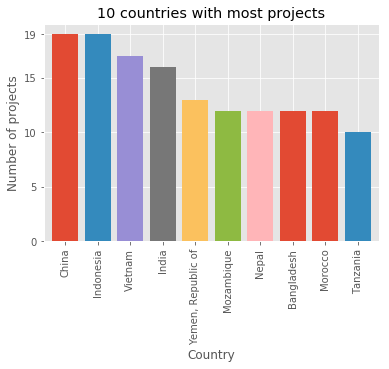

In [17]:
# graph
new_mp_graph = new_most_proj.sort_values(ascending=False).head(10)

plt.style.use('ggplot')
plt.title("10 countries with most projects")
plt.xlabel("Country")
plt.ylabel("Number of projects")
plt.yticks([0, 5, 10, 15, 19])

new_mp_graph.plot(kind='bar', grid=True, width=0.8)

### 2) Find the top 10 major project themes (using column 'mjtheme_namecode')

In [18]:
# load JSON: major_proj_data
with open("data/world_bank_projects.json") as json_file:
     major_proj_data = json.load(json_file)

major_proj_data   #nested element

# using normalization to create tables from nested element
major_proj = json_normalize(major_proj_data,'mjtheme_namecode')

print(major_proj.columns) 

Index(['code', 'name'], dtype='object')


In [19]:
# Looking below, we see that there are 11 project theme names, where 122 entries are blank.
major_proj_all = major_proj['name'].value_counts()

print(major_proj_all)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64


In [20]:
# Looking at 
print(major_proj.groupby(['code', 'name']).size())

code  name                                        
1                                                       5
      Economic management                              33
10                                                     14
      Rural development                               202
11                                                     27
      Environment and natural resources management    223
2                                                      15
      Public sector governance                        184
3                                                       3
      Rule of law                                      12
4                                                      16
      Financial and private sector development        130
5                                                       5
      Trade and integration                            72
6                                                      10
      Social protection and risk management           158
7                    

We can assume that, if there are no errors in the data, each code corresponds to a name.
With that assumption in mind, we can see now how many of the 122 counted blank names correspond to each project theme.

To know the definitive order of the 10 major project themes, we need to 'unpack' the blank entries, using the codes.

In [21]:
new_df = major_proj.sort_values(['code', 'name'])
new_df.head(11)

,code,name
212,1,
363,1,
1024,1,
1114,1,
1437,1,
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management


In [22]:
print(new_df['code'].count() == new_df['name'].count())

True


In [23]:
# replace the blank name values taking into account the corresponding code, using 'bfill'
new_df = new_df.replace('', np.nan).fillna(method='bfill')
new_df.head(11)

,code,name
212,1,Economic management
363,1,Economic management
1024,1,Economic management
1114,1,Economic management
1437,1,Economic management
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management


In [24]:
# So the top 10 major project themes are
new_df['name'].value_counts().head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

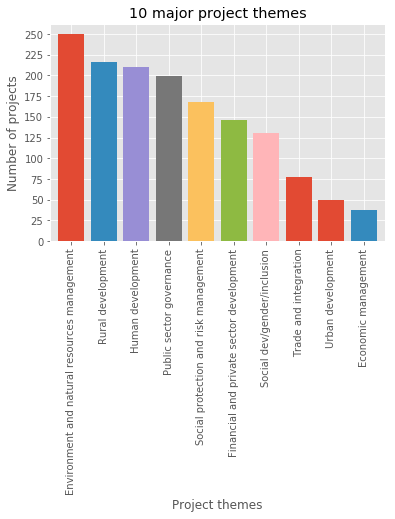

In [25]:
#graph
graph_major_themes = new_df['name'].value_counts().head(10)

plt.style.use('ggplot')
plt.title('10 major project themes')
plt.xlabel('Project themes')
plt.ylabel('Number of projects')
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

graph_major_themes.plot(kind='bar', grid=True, width=0.8)

### 3) In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in

See the dataframe created above: new_df

Another way of filling the missing blanks:

In [26]:
new_df_2 = major_proj.sort_values(['code', 'name'])
new_df_2.head(10)

,code,name
212,1,
363,1,
1024,1,
1114,1,
1437,1,
2,1,Economic management
88,1,Economic management
175,1,Economic management
204,1,Economic management
205,1,Economic management


In [27]:
# Here is the table with the correspondence between code and name
table_cn = new_df_2[new_df_2['name'] != ''].drop_duplicates()
table_cn

,code,name
2,1,Economic management
18,10,Rural development
6,11,Environment and natural resources management
5,2,Public sector governance
252,3,Rule of law
11,4,Financial and private sector development
4,5,Trade and integration
3,6,Social protection and risk management
8,7,Social dev/gender/inclusion
0,8,Human development


In [28]:
# Merge the 2 dataframes
complete_df = pd.merge(new_df_2, table_cn, on='code', suffixes=[' x', ' filled'])
complete_df.head(10)

,code,name x,name filled
0,1,,Economic management
1,1,,Economic management
2,1,,Economic management
3,1,,Economic management
4,1,,Economic management
5,1,Economic management,Economic management
6,1,Economic management,Economic management
7,1,Economic management,Economic management
8,1,Economic management,Economic management
9,1,Economic management,Economic management


In [29]:
# removing the unnecessary column 
del complete_df['name x']

In [30]:
# confirming 0 blanks
complete_df[complete_df['name filled'] == ''].count()

code           0
name filled    0
dtype: int64

In [31]:
# show the final dataframe
print(complete_df.shape)

complete_df.head(10)

(1499, 2)


,code,name filled
0,1,Economic management
1,1,Economic management
2,1,Economic management
3,1,Economic management
4,1,Economic management
5,1,Economic management
6,1,Economic management
7,1,Economic management
8,1,Economic management
9,1,Economic management


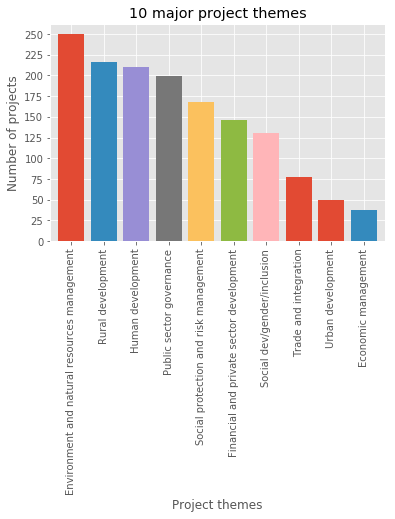

In [32]:
#graph
plt.title('10 major project themes')
plt.xlabel('Project themes')
plt.ylabel('Number of projects')
plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

complete_df['name filled'].value_counts().head(10).plot(kind='bar', grid=True, width=0.8)